# Transfer Learning Assignment

Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the assignment.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

In [ ]:
#the dataset that you are dealing with is quite large 3.7 GB and hence there are two methods to import the data to Colab 
# Method 1- you can use gdown module to get the data directly from Google drive to Colab
# the syntax is as follows !gdown --id file_id , for ex - running the below cell will import the rvl-cdip.rar dataset


In [ ]:
#!gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu

In [ ]:
# Method -2 you can also import the data using wget function
#https://www.youtube.com/watch?v=BPUfVq7RaY8


In [ ]:
#unrar the file
#get_ipython().system_raw("unrar x rvl-cdip.rar")

## 2. On this image data, you have to train 3 types of models as given below You have to split the data into Train and Validation data.

In [1]:
#import all the required libraries
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import datetime
import os
import random as rn
from tensorflow.keras.utils import plot_model

%load_ext tensorboard


In [2]:
df=pd.read_csv('labels_final.csv',dtype=str)

In [3]:
df.head()

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


In [4]:
df.shape

(48000, 2)

In [5]:
# https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
ImageFlow = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,validation_split=0.25) #convert the pixels in 
                                                                                    #range [0,255] to range [0,1]. 


train_generator=ImageFlow.flow_from_dataframe(dataframe=df,
directory="./data_final/",
x_col="path",
y_col="label",
subset="training",
batch_size=64,
seed=0,
shuffle=True,
class_mode="categorical",
target_size=(128,128))

validation_generator=ImageFlow.flow_from_dataframe(dataframe=df,
directory="./data_final/",
x_col="path",
y_col="label",
subset="validation",
batch_size=64,
seed=0,
shuffle=True,
class_mode="categorical",
target_size=(128,128))

Found 36000 validated image filenames belonging to 16 classes.
Found 12000 validated image filenames belonging to 16 classes.


In [6]:
train_steps_per_epoch = np.ceil(36000/64)
validation_steps_per_epoch = np.ceil(12000/64)



3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>

Note- In the reference notebook you were dealing with jpg images, in the given dataset you are dealing with tiff images. Imagedatagenrator works with both type of images. If you want to use custom data pipeline then you have to convert your tiff images to jpg images.

4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)


6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3426/code-example-cats-vs-dogs/8/module-8-neural-networks-computer-vision-and-deep-learning </a>
</pre>

7. Do print model.summary() and draw model_plots for each of the model.

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

In [7]:

os.environ['PYTHONHASHSEED'] = '0'

##https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)
tf.random.set_seed(0)

In [9]:
vgg_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
)
vgg_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [9]:
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
for layer in vgg_model.layers:
    layer.trainable = False
input_from_vgg = vgg_model.output
conv1 = Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', 
               activation = 'relu', kernel_initializer='HeUniform') (input_from_vgg)
max_pool1 = MaxPool2D(pool_size=(2, 2)) (conv1)
flat = Flatten() (max_pool1)
dense_1 = Dense(256, activation = 'relu', kernel_initializer='HeUniform') (flat)
dense_2 = Dense(128, activation = 'relu', kernel_initializer='HeUniform') (dense_1)
output = Dense(16,activation='softmax')(dense_2)

model_one = Model(inputs = vgg_model.input, outputs = output)
model_one.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [10]:
filepath="model_save/best_model_one.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2, verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= ("logs/fits/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")),
                                                      histogram_freq=1,write_graph=True)

call_back_list = [ earlystop, checkpoint, tensorboard_callback]

In [11]:
model_one.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model_one.fit( train_generator,steps_per_epoch = train_steps_per_epoch,epochs=3,
                        validation_data = validation_generator, validation_steps = validation_steps_per_epoch, 
                        callbacks=[call_back_list])

Epoch 1/3
563/563 [==============================] - 178s 300ms/step - loss: 1.5444 - accuracy: 0.5238 - val_loss: 1.2278 - val_accuracy: 0.6213

Epoch 00001: val_accuracy improved from -inf to 0.62133, saving model to model_save\best_model_one.hdf5
Epoch 2/3
563/563 [==============================] - 150s 266ms/step - loss: 1.1656 - accuracy: 0.6388 - val_loss: 1.1875 - val_accuracy: 0.6358

Epoch 00002: val_accuracy improved from 0.62133 to 0.63583, saving model to model_save\best_model_one.hdf5
Epoch 3/3
563/563 [==============================] - 149s 265ms/step - loss: 1.0246 - accuracy: 0.6807 - val_loss: 1.1538 - val_accuracy: 0.6527

Epoch 00003: val_accuracy improved from 0.63583 to 0.65267, saving model to model_save\best_model_one.hdf5


In [52]:
%tensorboard --logdir logs/fits

Reusing TensorBoard on port 6006 (pid 880), started 0:01:06 ago. (Use '!kill 880' to kill it.)

### model_one Tensorboard accuracy and loss

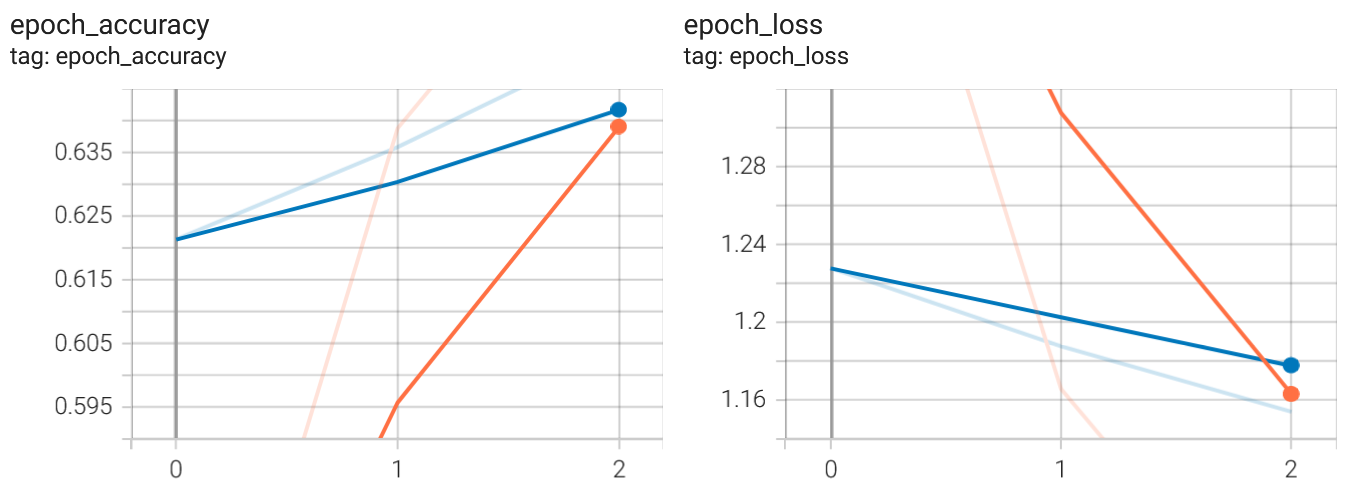

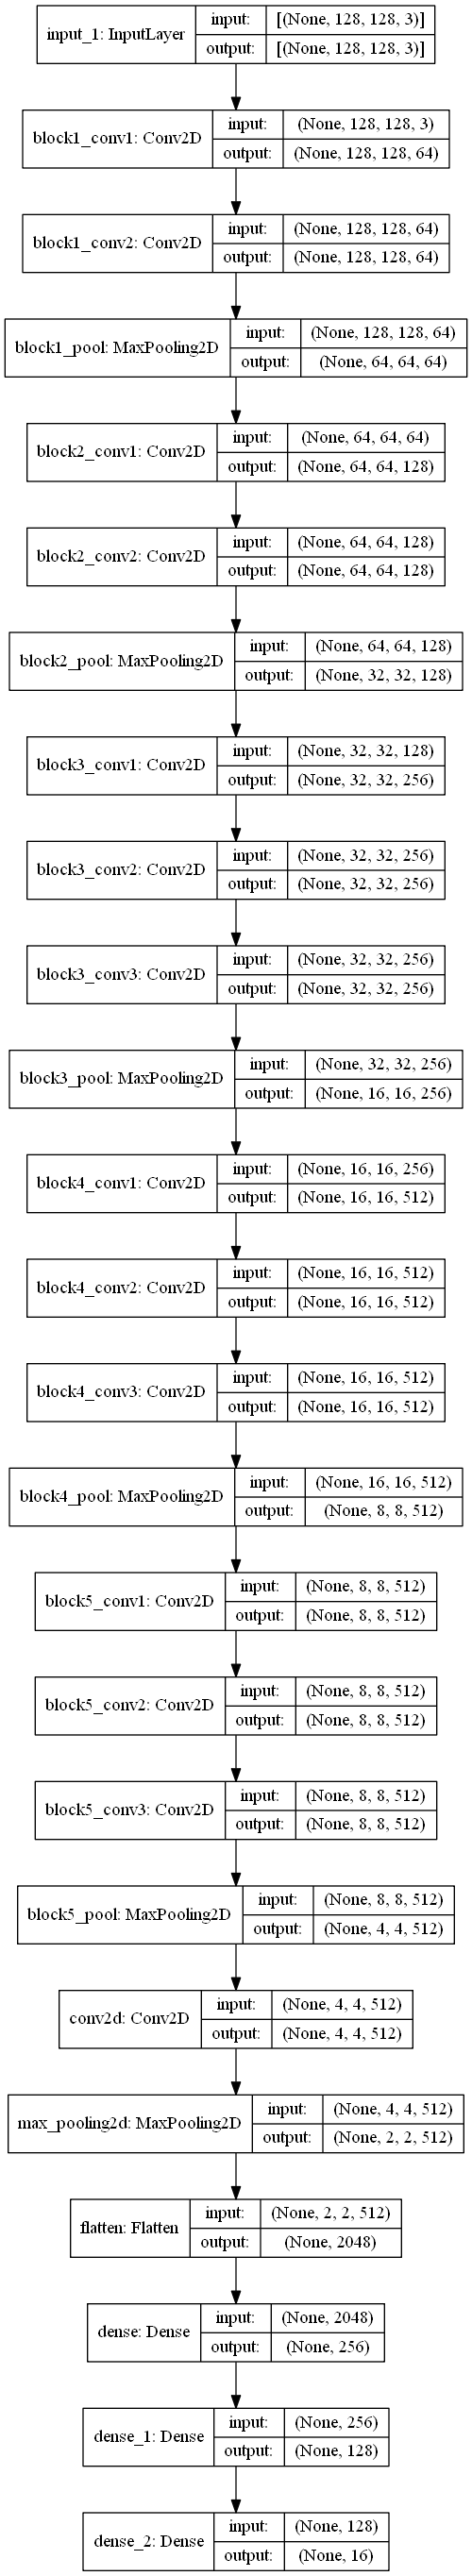

In [16]:
plot_model(model_one, to_file='model_one.png', show_shapes=True)

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC 
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. 
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. 
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the 
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

In [12]:
tf.keras.backend.clear_session()

In [13]:
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
for layer in vgg_model.layers:
    layer.trainable = False
input_from_vgg = vgg_model.output

conv_1 = Conv2D(filters = 2048, kernel_size = (4,4), padding = 'valid', 
               activation = 'relu', kernel_initializer='HeUniform') (input_from_vgg)


conv_2 = Conv2D(filters = 2048, kernel_size = (1,1), padding = 'valid', 
               activation = 'relu', kernel_initializer='HeUniform') (conv_1)


output_two = Conv2D(filters = 16, kernel_size = (1,1), activation='softmax')(conv_2)

flat_ = Flatten() (output_two)

model_two = Model(inputs = vgg_model.input, outputs = flat_)
model_two.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [14]:
filepath="model_save/best_model_two.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2, verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= ("logs/fits/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")),
                       histogram_freq=1,write_graph=True)

call_back_list = [ earlystop, checkpoint, tensorboard_callback]

In [15]:
model_two.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model_two.fit( train_generator,steps_per_epoch = train_steps_per_epoch,epochs=3,
                        validation_data = validation_generator, validation_steps = validation_steps_per_epoch, 
                        callbacks=[call_back_list])

Epoch 1/3
563/563 [==============================] - 262s 447ms/step - loss: 1.6402 - accuracy: 0.5293 - val_loss: 1.2483 - val_accuracy: 0.6107

Epoch 00001: val_accuracy improved from -inf to 0.61067, saving model to model_save\best_model_two.hdf5
Epoch 2/3
563/563 [==============================] - 162s 286ms/step - loss: 1.1337 - accuracy: 0.6476 - val_loss: 1.1635 - val_accuracy: 0.6364

Epoch 00002: val_accuracy improved from 0.61067 to 0.63642, saving model to model_save\best_model_two.hdf5
Epoch 3/3
563/563 [==============================] - 160s 284ms/step - loss: 1.0044 - accuracy: 0.6868 - val_loss: 1.1059 - val_accuracy: 0.6607

Epoch 00003: val_accuracy improved from 0.63642 to 0.66075, saving model to model_save\best_model_two.hdf5


In [15]:
%tensorboard --logdir logs/fits

Reusing TensorBoard on port 6006 (pid 11692), started 3:18:56 ago. (Use '!kill 11692' to kill it.)

### model_two Tensorboard accuracy and loss

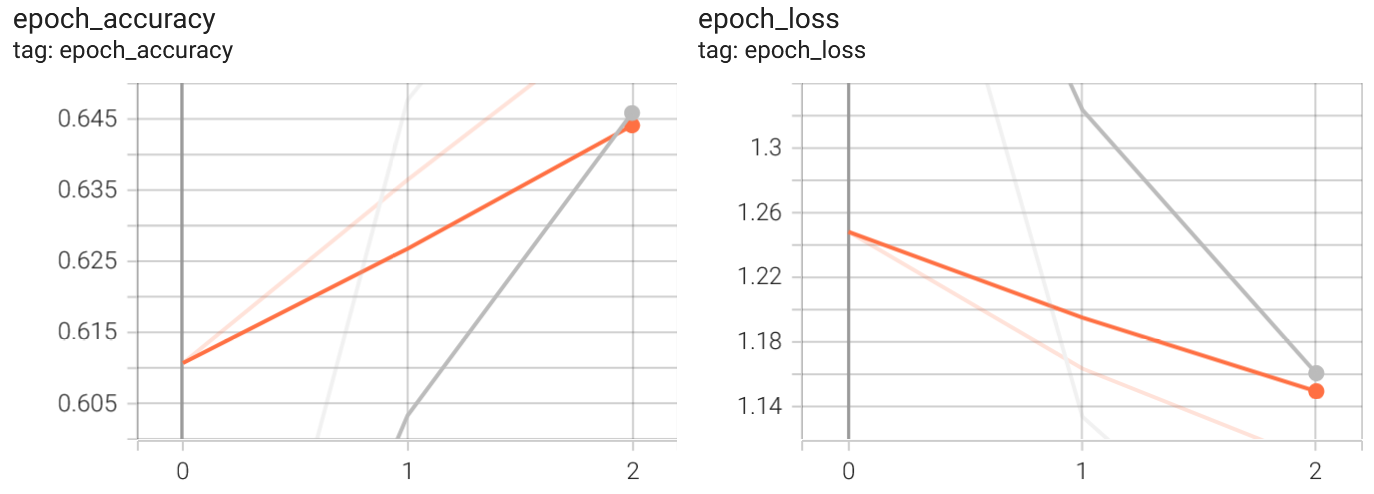

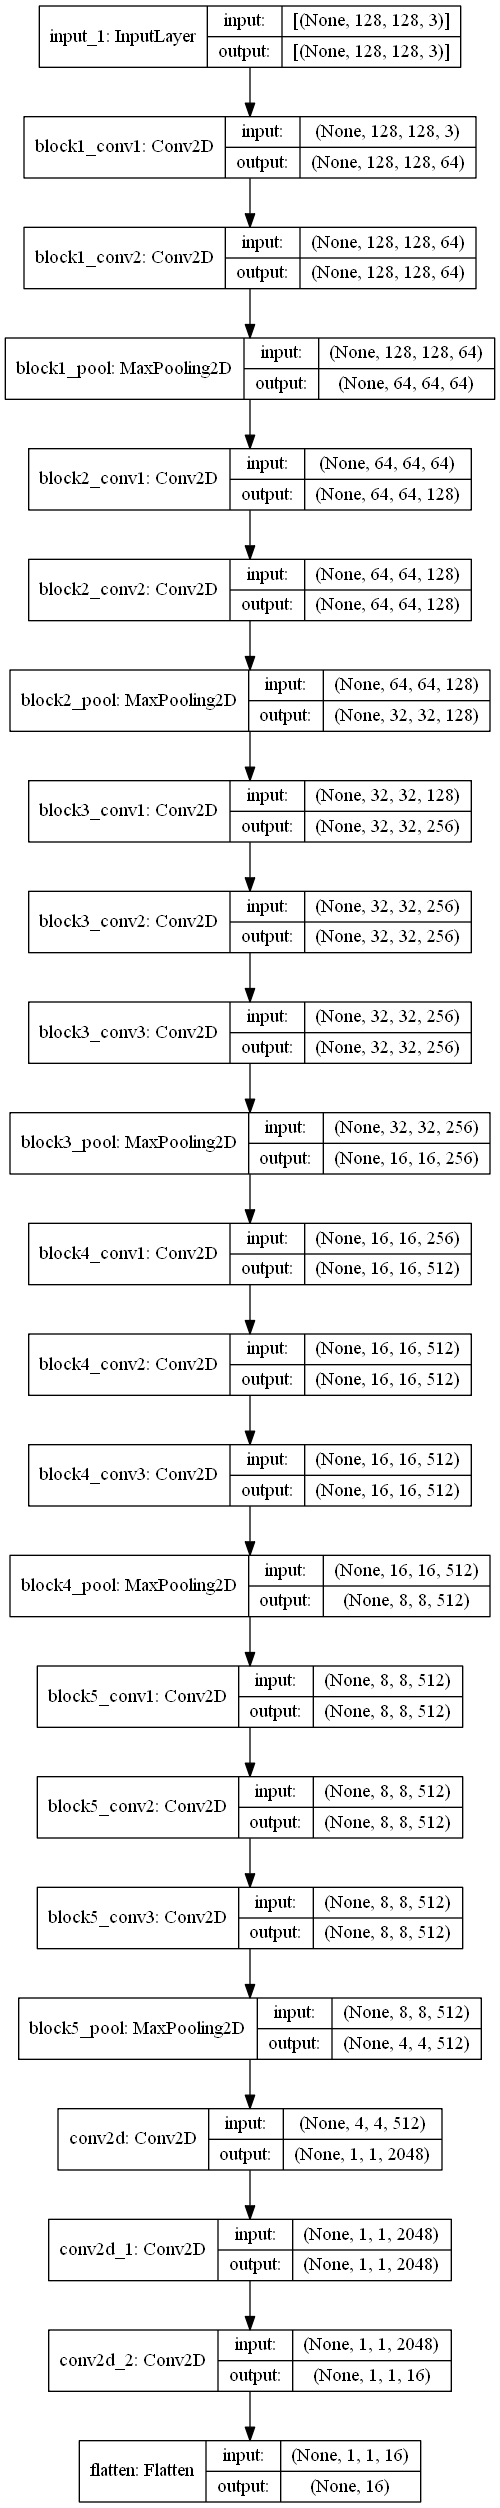

In [36]:
plot_model(model_two, to_file='model_two.png', show_shapes=True)

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [30]:
tf.keras.backend.clear_session()

In [31]:
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
for layer in vgg_model.layers[-6:]:
    layer.trainable = True
    
for layer in vgg_model.layers[:-6]:
    layer.trainable = False
    
input_from_vgg = vgg_model.output

conv_1_ = Conv2D(filters = 2048, kernel_size = (4,4), padding = 'valid', 
               activation = 'relu', kernel_initializer='HeUniform') (input_from_vgg)


conv_2_ = Conv2D(filters = 2048, kernel_size = (1,1), padding = 'valid', 
               activation = 'relu', kernel_initializer='HeUniform') (conv_1_)


output_three = Conv2D(16, kernel_size = (1,1), activation='softmax')(conv_2_)

flat_3 = Flatten() (output_three)

model_three = Model(inputs = vgg_model.input, outputs = flat_3)
model_three.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [32]:
filepath="model_save/best_model_three.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=2, verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= ("logs/fits/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")),
                       histogram_freq=1,write_graph=True)

call_back_list = [ earlystop, checkpoint, tensorboard_callback]

In [33]:
model_three.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model_three.fit( train_generator,steps_per_epoch = train_steps_per_epoch,epochs=5,
                        validation_data = validation_generator, validation_steps = validation_steps_per_epoch, 
                        callbacks=[call_back_list])

Epoch 1/5
563/563 [==============================] - 273s 483ms/step - loss: 2.7728 - accuracy: 0.0619 - val_loss: 2.7727 - val_accuracy: 0.0619

Epoch 00001: val_accuracy improved from -inf to 0.06192, saving model to model_save\best_model_three.hdf5
Epoch 2/5
563/563 [==============================] - 279s 496ms/step - loss: 2.7727 - accuracy: 0.0607 - val_loss: 2.7730 - val_accuracy: 0.0593

Epoch 00002: val_accuracy did not improve from 0.06192
Epoch 3/5
563/563 [==============================] - 278s 493ms/step - loss: 2.7727 - accuracy: 0.0627 - val_loss: 2.7730 - val_accuracy: 0.0593

Epoch 00003: val_accuracy did not improve from 0.06192
Epoch 00003: early stopping


In [12]:
%tensorboard --logdir logs/fits

Reusing TensorBoard on port 6006 (pid 11692), started 15:28:36 ago. (Use '!kill 11692' to kill it.)

### model_three Tensorboard accuracy and loss

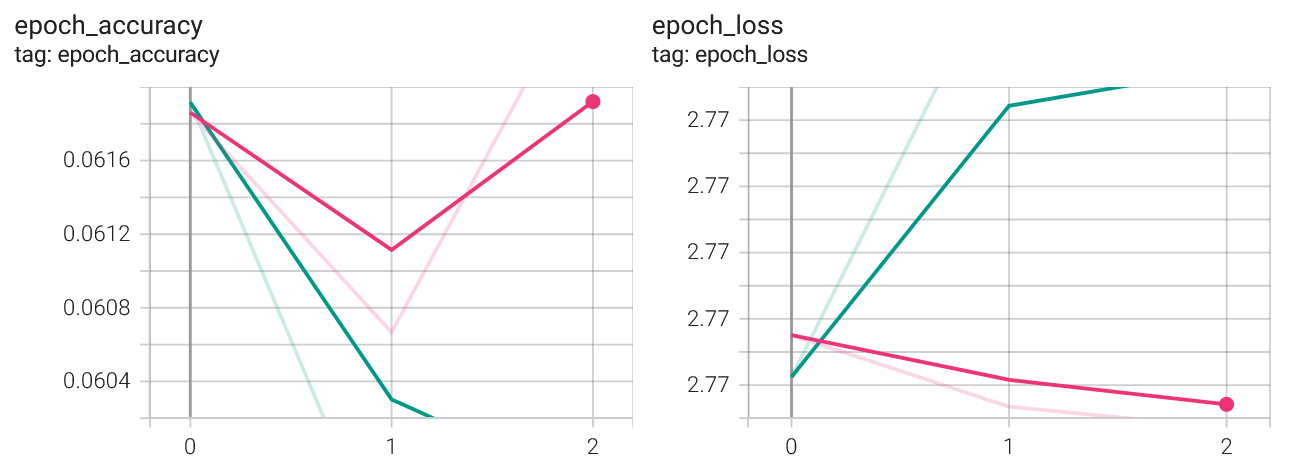

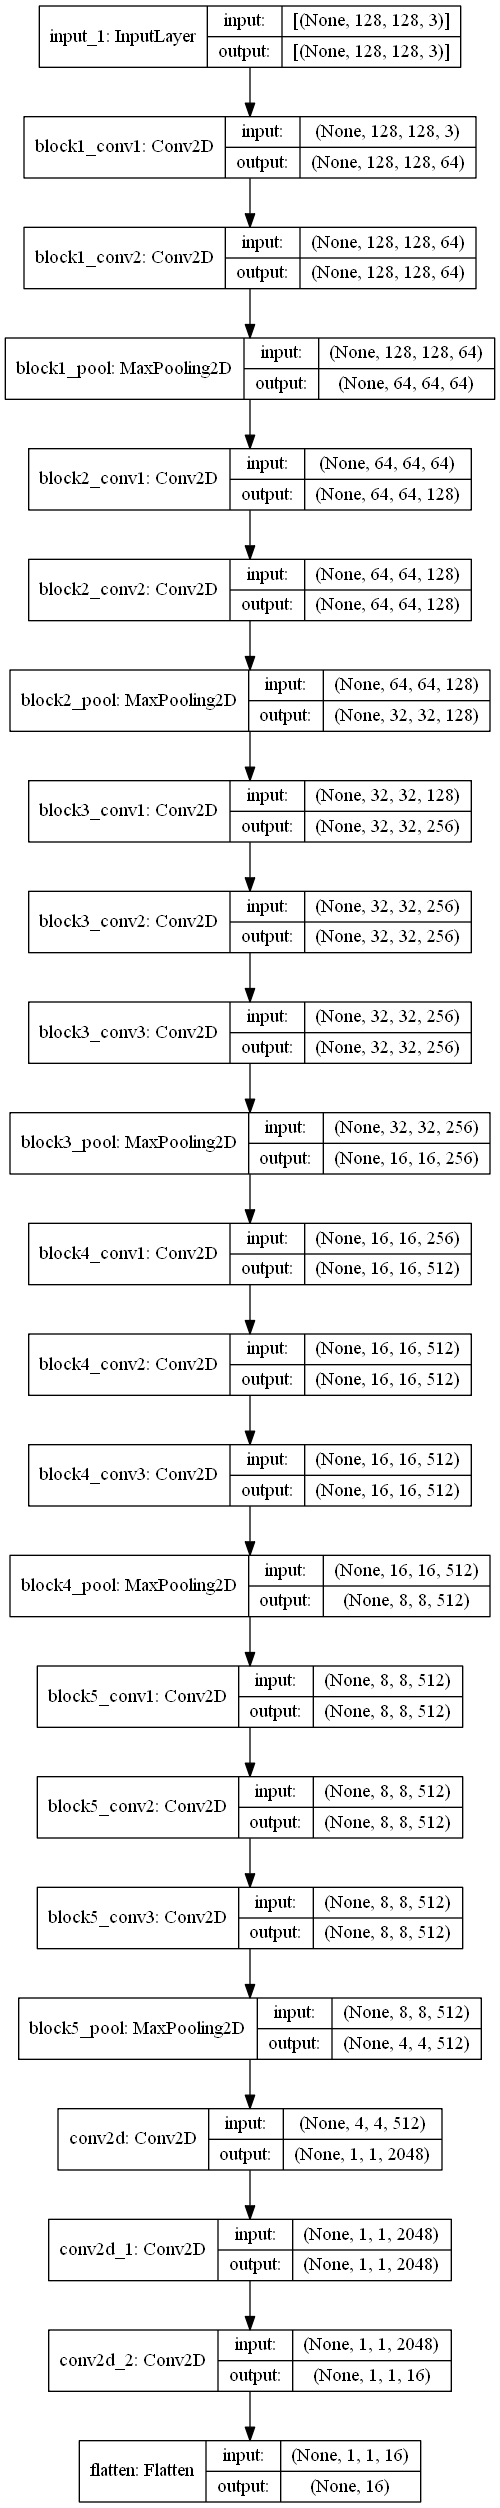

In [35]:
plot_model(model_three, to_file='model_three.png', show_shapes=True)

### Please write your observations or a brief summary of the results that you get after performing transfer learning with reference to model1, model2 and model3

In [34]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "Epochs", "val_accuracy"]

x.add_row(["model_one", "3","0.6526"])
x.add_row(["model_two", "3","0.6607"])
x.add_row(["model_three", "3","0.0619"])

print(x)

+-------------+--------+--------------+
|    Model    | Epochs | val_accuracy |
+-------------+--------+--------------+
|  model_one  |   3    |    0.6526    |
|  model_two  |   3    |    0.6607    |
| model_three |   3    |    0.0619    |
+-------------+--------+--------------+


### Observations:

1. model_one only had fully connected layers after vgg-16 model as trainable layers and also had the least trainable parameters among all three models (2,919,312).
2. model_two used convolution layers instead of fully connected layers after vgg-16 model as trainable layers and had the second most trainable parameters among all three models (21,008,400). 
3. model_three used the same architecture of model_two, but also had the last 6 layers in vgg-16 model to be set as trainable. Because of training these additional layers, it had the highest number of traininable parameters among all three models (30,447,632). 
4. model_one took the least time to train because it had the least number of trainable parameters while model_two took longer and model_three took the longest time to train as they had the higher number of trainable parameters.
5. Since model_three has 9 layers  and high number of parameters to train, it needs significant number of epochs to get higher accuracy. This is the reason why model_three only had 6% accuracy after three epochs.
6. Since model_one and mode_two only had 3 layers to be trained and used the pre-trained weights from vgg-16 model, they have  more than 60% accuracy after 3 epochs